In [1]:
import pandas as pd
import numpy as np
import tensorflow.keras.layers as kl
import tensorflow.keras.models as km
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import glob as gb
import cv2

In [2]:
#Listing Directories
trainpath = 'seg_train/'
testpath = 'seg_test/'
predpath = 'seg_pred/'
for folder in  os.listdir(trainpath+'seg_train') :
    file=gb.glob(pathname=str(trainpath+'seg_train//'+folder+'/*.jpg'))
    print(f'For training data , found {len(file)} in folder {folder}')

For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier
For training data , found 2512 in folder mountain
For training data , found 2274 in folder sea
For training data , found 2382 in folder street


In [3]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def gettype(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [4]:
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(123, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(119, 150, 3)        1
(133, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(131, 150, 3)        1
(149, 150, 3)        1
(105, 150, 3)        1
(141, 150, 3)        1
(115, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(124, 150, 3)        1
(97, 150, 3)         1
dtype: int64

In [5]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

In [6]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['seg_train/seg_train', 'seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in os.listdir(os.path.join(dataset, folder)):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (150,150)) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [7]:
def display(class_names,images,labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [8]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading seg_train/seg_train
Loading seg_test/seg_test


In [9]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

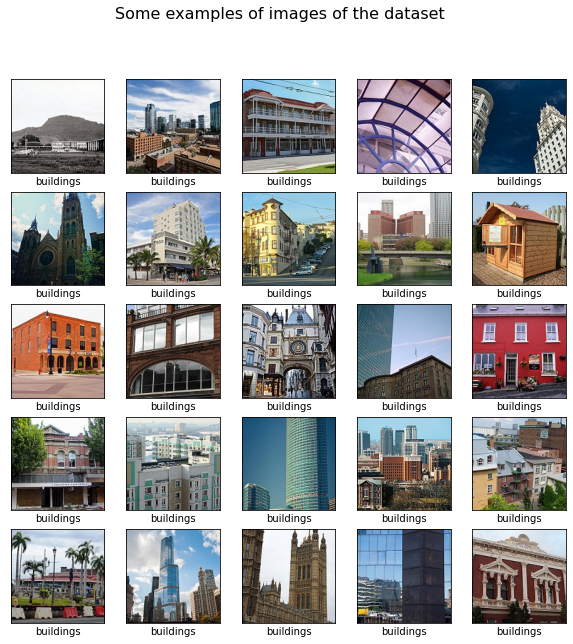

In [10]:
display(class_names,train_images,train_labels)

In [11]:
#CNN
cnn=km.Sequential()
cnn.add(kl.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
cnn.add(kl.BatchNormalization())
cnn.add(kl.MaxPooling2D(2,2))
cnn.add(kl.Conv2D(64,(3,3),activation='relu'))
cnn.add(kl.BatchNormalization())
cnn.add(kl.MaxPooling2D(2,2))
cnn.add(kl.Conv2D(64,(3,3),activation='relu'))
cnn.add(kl.BatchNormalization())
cnn.add(kl.MaxPooling2D(2,2))
cnn.add(kl.Dropout(0.2))
cnn.add(kl.Flatten())
cnn.add(kl.Dense(64,activation='relu'))
cnn.add(kl.Dense(len(class_names),activation='softmax'))

In [12]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model=cnn.fit(train_images,train_labels,validation_split=0.2,epochs=10)

Train on 11227 samples, validate on 2807 samples
Epoch 1/10
11227/11227 [==============================] - 522s 46ms/sample - loss: 0.9425 - accuracy: 0.6856 - val_loss: 4.6787 - val_accuracy: 0.0791
Epoch 2/10
11227/11227 [==============================] - 528s 47ms/sample - loss: 0.5760 - accuracy: 0.7941 - val_loss: 9.8626 - val_accuracy: 0.1083
Epoch 3/10
11227/11227 [==============================] - 492s 44ms/sample - loss: 0.4520 - accuracy: 0.8374 - val_loss: 29.6484 - val_accuracy: 0.0627
Epoch 4/10
11227/11227 [==============================] - 445s 40ms/sample - loss: 0.3810 - accuracy: 0.8608 - val_loss: 24.0735 - val_accuracy: 0.1361
Epoch 5/10
11227/11227 [==============================] - 461s 41ms/sample - loss: 0.2851 - accuracy: 0.8945 - val_loss: 34.8178 - val_accuracy: 0.0923
Epoch 6/10
11227/11227 [==============================] - 444s 40ms/sample - loss: 0.2610 - accuracy: 0.9051 - val_loss: 51.5059 - val_accuracy: 0.0869
Epoch 7/10
11227/11227 [=================

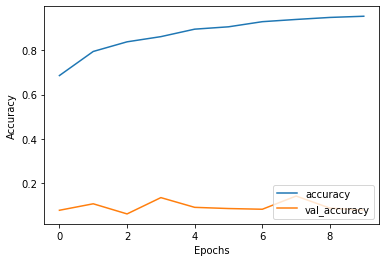

In [22]:
plt.plot(model.history['accuracy'],label='accuracy')
plt.plot(model.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

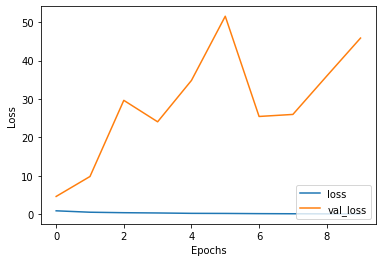

In [23]:
plt.plot(model.history['loss'],label='loss')
plt.plot(model.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [17]:
predictions = cnn.predict(test_images)
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:0.1f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


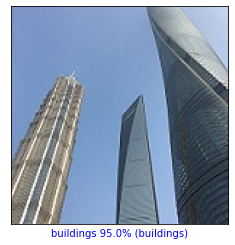

In [29]:
plot_image(310,predictions[310],test_labels,test_images)

In [74]:
def load_pred():
    """Load Prediction data"""
    output=[]
    datasets=['seg_pred/seg_pred']
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for file in os.listdir(dataset):
            img_path = os.path.join(dataset, file)
             # Open and resize the img
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (150,150)) 
                
            # Append the image and its corresponding label to the output
            images.append(image)
            #labels.append(label)
                
               
                
        images = np.array(images, dtype = 'float32')
        #labels = np.array(labels, dtype = 'int32')   
        

    return images


In [75]:
pred=load_pred()

Loading seg_pred/seg_pred


In [76]:
pred = pred / 255.0

In [77]:
#Predicting prediction dataset
prediction = cnn.predict(pred)
def plot_image_pred(i, predictions_array, img):
  predictions_array,img = predictions_array,img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  """if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'"""

  plt.xlabel("{} {:0.1f}%".format(class_names[predicted_label],
                                100*np.max(predictions_array)))

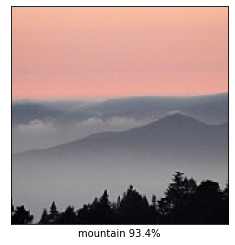

In [78]:
plot_image_pred(12, prediction[12],pred)